In [2]:
import sys
sys.path.append('/Users/jh7685/Dropbox/NYU/Projects/SF/Scripts')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To grasp a better sense of how the 2D model is represented with a polar plot, I'm going to plot a preferred period using the equation (6) in the Broderick et al. paper. \begin{aligned}p_{v}=\left[a r_{v}+b\right][1&+p_{1} \cos \left(2 \theta_{l}\right)+p_{2} \cos \left(4 \theta_{l}\right) \\
&+p_{3} \cos \left(2\left(\theta_{l}-\theta_{v}\right)\right) \\
&\left.+p_{4} \cos \left(4\left(\theta_{l}-\theta_{v}\right)\right)\right]
\end{aligned}

First, let's start with this.
\begin{aligned}p_{v}=\left[a r_{v}+b\right]\end{aligned}

In [10]:
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    R = np.sqrt(x**2 + y**2)
    return (theta, R)

In [13]:
def image_polar(row, R, TH):
   im = np.cos(row['w_r']*np.log(R) + row['w_a']*TH + row['phase'])
   return im

In [15]:
stim = {'Class': ['pinwheel', 'annulus', 'forward spiral', 'reverse spiral'], 'w_a': [8, 0, 8, 8], 'w_r': [0, 8, 8, -8], 'phase': np.ones(4)}
stim = pd.DataFrame(stim)

In [16]:
x, y = np.meshgrid(np.linspace(-12, 12, 1001), np.linspace(-12, 12, 1001))
[theta, R] = cart2pol(x, y)

In [18]:
stim.iterrows()

<generator object DataFrame.iterrows at 0x7f841021f250>

In [39]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [68]:
stim_image = {}
stim_sf = {}
stim_ori = {}

for i in np.arange(0, len(stim.Class.unique())):
    row = stim.query('index == @i')
    w_r_array = np.full(shape=R.shape, fill_value=row['w_r'])
    w_a_array = np.full(shape=theta.shape, fill_value=row['w_a'])
    phase_array = np.full(shape=theta.shape, fill_value=row['phase'])
    im = np.cos(w_r_array*np.log(R) + w_a_array*theta + phase_array)
    stim_image[row.Class.item()] = im
    sf = np.sqrt(w_r_array**2 + w_a_array**2) / R
    stim_sf[row.Class.item()] = sf
    ori = theta - np.arctan2(w_a_array, w_r_array)
    ori = ori - (ori // np.pi)*np.pi
    stim_ori[row.Class.item()] = ori


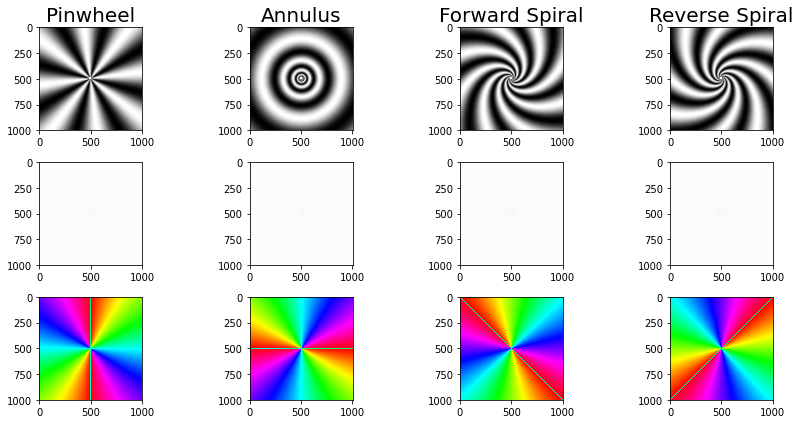

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 6), sharex=False, sharey=False)
for k, i in zip(np.arange(0,4), stim_image.keys()):
    axes[0,k].imshow(stim_image[i], cmap='gray')
    axes[1,k].imshow(stim_sf[i], cmap='Purples')
    axes[2,k].imshow(stim_ori[i], cmap='hsv')
    axes[0,k].set_title(f'{i.title()}', fontsize=20)
plt.tight_layout()
plt.show()

Using these stimuli, let's build a 2-D model. 2-D model needs three different parameter sets. Model parameters, Voxel parameters, and Stimulus parameters.

In [92]:
# similar to the values in figure 9a in Billy's paper
M = pd.DataFrame({'a': 0.12,
                      'b': 0.35,
                      'p1':0.06,
                      'p2':-0.03,
                      'p3':0.07,
                      'p4':0.00,
                      'a1':0.04,
                      'a2':-0.01,
                      's': 2.2}, index=[0])
M.head()

,a,b,p1,p2,p3,p4,a1,a2,s
0,0.12,0.35,0.06,-0.03,0.07,0.0,0.04,-0.01,2.2


In [ ]:
## 2D model
def local_to_response_2D(M, S, ):
    Av = M['a1'] * np.cos(2*S['ori']) +  M['a2'] * np.cos(2*S['ori'])
    Pv = (M['a'] * V['r'] + M['b']) * (1 +
                                       M['p1']*np.cos(2*S['ori']) +
                                       M['p2']*np.cos(4*S['ori']) +
                                       M['p3']*np.cos(2*(S['ori'] - V['th'])) +
                                       M['p4']*np.cos(4*S['ori'] - V['th']))

    numerator = np.log2(sf) + np.log2(Pv)
    prediction = Av * np.exp(-0.5*(numerator/sigma)**2)
    return prediction

In [ ]:

Av = 1 + ....
    M.a1*cos(2*S.ORI) + ...
    M.a2*cos(4*S.ORI);

SF = S.SF;
Pv = (M.a * V.R + M.b).*(1 + ....
    M.p1*cos(2*S.ORI) + ...
    M.p2*cos(4*S.ORI) + ...
    M.p3*cos(2*(S.ORI - V.TH)) + ...
    M.p4*cos(4*(S.ORI - V.TH)));

sigma = M.s;

PRED = Av .* exp(-1/2 * ((log2(SF)+log2(Pv))/sigma).^2);

In [ ]:

% Pick 3 eccentricities, similar to figure 8 in Billy's paper
X = [1.68 4.94 8.86];
Y = zeros(size(X));
[V.TH, V.R] = cart2pol(X,Y);
figure(3); polarplot(V.TH, V.R, 'x', 'MarkerSize', 18)


In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()